In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings(action='ignore')

In [158]:
file_dir = '/mnt/data/hernandom/Microscopy_Data/Histology_of_tail_lesions/6OHDA/HMV_Analysis/OHDA_analysis_df_all_mice_20062022.csv'

In [159]:
df = pd.read_csv(file_dir, index_col=0)

In [160]:
df['mouse id'].unique()

array(['C01', 'C03', 'C042', 'C052', 'C062', 'DRD101', 'DRD102', 'N06',
       'PV01', 'PV02', 'PV03', 'PV04', 'PV05', 'PV06', 'PV08', 'SF04',
       'SF06', 'SF07', 'SF08', 'SF09', 'Somcre05', 'Somcre06', 'Somcre07',
       'Somcre08', 'Somcre09'], dtype=object)

In [161]:
df

,slice id,Atlas_location,slide number,intensity ctx right,intensity left,intensity right,mouse id,intensity ctx left,intensity background right,intensity background left,ratio_left,intensity ctx,background intensity,ratio_right,average intensity,intensity background,experimental_group
0,anterior,287.0,3,2307.0,3471,3235.0,C01,2229.0,1838.0,1898.0,4.752266,2268.0,1898,1.426367,0.478395,NaN,control_1
1,tail,251.0,6,2177.0,2570,3298.0,C01,2165.0,1743.0,1718.0,1.906040,2171.0,1718,1.519116,0.351451,NaN,control_1
2,anterior,285.0,2,2057.0,4011,2577.0,C01,2311.0,1586.0,1881.0,4.953488,2184.0,1881,1.179945,0.508242,NaN,control_1
3,tail,252.0,4,2097.0,2592,2785.0,C01,2140.0,1749.0,1856.0,2.591549,2118.5,1856,1.314609,0.269058,NaN,control_1
4,anterior,339.0,1,2244.0,3208,3429.0,C01,2358.0,1846.0,2056.0,3.814570,2301.0,2056,1.490222,0.442199,NaN,control_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,anterior,NaN,1,838.0,1739,856.0,Somcre09,895.0,798.0,794.0,9.356436,866.5,794,0.987882,0.497403,NaN,OHDA_2
248,tail,NaN,3,927.0,1385,1540.0,Somcre09,882.0,847.0,807.0,7.706667,904.5,807,1.702598,0.616915,NaN,OHDA_2
249,tail,NaN,7,831.0,873,868.0,Somcre09,850.0,800.0,757.0,1.247312,840.5,757,1.032719,0.035693,NaN,OHDA_2
250,anterior,NaN,0,929.0,2038,942.0,Somcre09,926.0,843.0,802.0,9.967742,927.5,802,1.015633,0.606469,NaN,OHDA_2


In [162]:
# drop whatever does not have an atlas location
df = df[df['Atlas_location'].notna()]

In [163]:
# mice_to_keep = ['C01', 'C02', 'C03', 'PV01', 'PV02', 'PV03', 'PV04',
#                 'PV05', 'PV06', 'PV08', 'SF04', 'SF06', 'SF07', 'SF09']

In [164]:
# df = df[df['mouse id'].isin(mice_to_keep)]

In [165]:
df.groupby('mouse id').experimental_group.unique()

mouse id
C01         [control_1]
C03         [control_1]
C042         [OHDA_1_2]
PV01            [6OHDA]
PV02            [6OHDA]
PV03            [6OHDA]
PV04            [6OHDA]
PV05            [6OHDA]
PV06            [6OHDA]
PV08            [6OHDA]
SF04    [Cortex Buffer]
SF06    [Cortex Buffer]
SF07            [6OHDA]
SF09            [6OHDA]
Name: experimental_group, dtype: object

In [145]:
# combine groups
df.loc[df.experimental_group == 'control_1', 'experimental_group'] = 'Cortex Buffer'
df.loc[df.experimental_group == 'OHDA_1_2', 'experimental_group'] = '6OHDA'

In [166]:
# convert atlas location to mm
# it needs to be flipped as well

df['Atlas_location'] = (528 - df.Atlas_location) * 25 / 1000

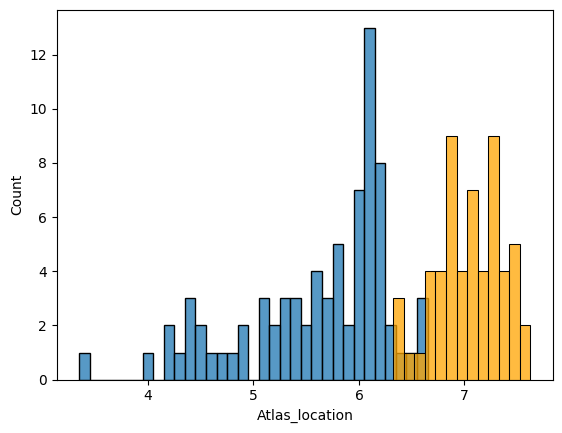

In [167]:
sns.histplot(df[df['slice id']=='anterior'].Atlas_location, binwidth=.1)
sns.histplot(df[df['slice id']=='tail'].Atlas_location, binwidth=.1, color='orange')
plt.show()

In [168]:
df

,slice id,Atlas_location,slide number,intensity ctx right,intensity left,intensity right,mouse id,intensity ctx left,intensity background right,intensity background left,ratio_left,intensity ctx,background intensity,ratio_right,average intensity,intensity background,experimental_group
0,anterior,6.025,3,2307.0,3471,3235.0,C01,2229.0,1838.0,1898.0,4.752266,2268.0,1898,1.426367,0.478395,NaN,control_1
1,tail,6.925,6,2177.0,2570,3298.0,C01,2165.0,1743.0,1718.0,1.906040,2171.0,1718,1.519116,0.351451,NaN,control_1
2,anterior,6.075,2,2057.0,4011,2577.0,C01,2311.0,1586.0,1881.0,4.953488,2184.0,1881,1.179945,0.508242,NaN,control_1
3,tail,6.900,4,2097.0,2592,2785.0,C01,2140.0,1749.0,1856.0,2.591549,2118.5,1856,1.314609,0.269058,NaN,control_1
4,anterior,4.725,1,2244.0,3208,3429.0,C01,2358.0,1846.0,2056.0,3.814570,2301.0,2056,1.490222,0.442199,NaN,control_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,anterior,6.025,6,385.0,3640,3450.0,SF09,NaN,NaN,NaN,9.454545,385.0,172,8.961039,8.207792,172.0,6OHDA
190,tail,6.800,4,371.0,690,562.0,SF09,NaN,NaN,NaN,1.859838,371.0,174,1.514825,0.687332,174.0,6OHDA
191,anterior,6.125,8,408.0,897,1194.0,SF09,NaN,NaN,NaN,2.198529,408.0,173,2.926471,1.562500,173.0,6OHDA
192,tail,6.825,5,417.0,414,417.0,SF09,NaN,NaN,NaN,0.992806,417.0,173,1.000000,-0.003597,173.0,6OHDA


In [169]:
# recalculate everything
df_clean = df[['mouse id', 'experimental_group', 'Atlas_location', 'intensity left',
               'intensity right', 'intensity ctx left', 'intensity ctx right',
               'intensity background left', 'intensity background right', 'intensity background']]


In [170]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_clean)

,mouse id,experimental_group,Atlas_location,intensity left,intensity right,intensity ctx left,intensity ctx right,intensity background left,intensity background right,intensity background
0,C01,control_1,6.025,3471,3235.0,2229.0,2307.0,1898.0,1838.0,NaN
1,C01,control_1,6.925,2570,3298.0,2165.0,2177.0,1718.0,1743.0,NaN
2,C01,control_1,6.075,4011,2577.0,2311.0,2057.0,1881.0,1586.0,NaN
3,C01,control_1,6.900,2592,2785.0,2140.0,2097.0,1856.0,1749.0,NaN
4,C01,control_1,4.725,3208,3429.0,2358.0,2244.0,2056.0,1846.0,NaN
5,C01,control_1,6.450,3273,3607.0,2223.0,2118.0,1892.0,1756.0,NaN
6,C01,control_1,5.100,3321,3051.0,2406.0,2171.0,2023.0,1687.0,NaN
7,C03,control_1,5.425,3466,2236.0,2255.0,2039.0,1850.0,1879.0,NaN
8,C03,control_1,6.375,2922,3262.0,2246.0,2313.0,1797.0,1956.0,NaN
9,C03,control_1,6.325,2828,2680.0,2128.0,2084.0,1938.0,1764.0,NaN


In [171]:
# some slices have only one measure for left and right ctx and background
# copy the values of the other side in those nan values
df_clean["intensity ctx left"].fillna(df_clean["intensity ctx right"], inplace=True)
df_clean["intensity background left"].fillna(df_clean["intensity background"], inplace=True)
df_clean["intensity background right"].fillna(df_clean["intensity background"], inplace=True)

# drop column
df_clean.drop(labels='intensity background', axis='columns', inplace=True)

In [172]:
# split left and right to get one value per side per slide
df_left = df_clean[['mouse id', 'experimental_group', 'Atlas_location', 'intensity left',
                    'intensity ctx left', 'intensity background left']]
df_right = df_clean[['mouse id', 'experimental_group', 'Atlas_location', 'intensity right',
                     'intensity ctx right', 'intensity background right']]
df_left['brain_side'] = 'left'
df_right['brain_side'] = 'right'

# rename columns
df_left.rename(columns={'mouse id': 'mouse_id',
                        'intensity left': 'striatum_intensity',
                        'intensity ctx left': 'cortex_intensity',
                        'intensity background left': 'background_intensity',
                       }, inplace=True)
df_right.rename(columns={'mouse id': 'mouse_id',
                        'intensity right': 'striatum_intensity',
                        'intensity ctx right': 'cortex_intensity',
                        'intensity background right': 'background_intensity',
                       }, inplace=True)

dff = pd.concat([df_left, df_right], ignore_index=True)

In [173]:
dff

,mouse_id,experimental_group,Atlas_location,striatum_intensity,cortex_intensity,background_intensity,brain_side
0,C01,control_1,6.025,3471.0,2229.0,1898.0,left
1,C01,control_1,6.925,2570.0,2165.0,1718.0,left
2,C01,control_1,6.075,4011.0,2311.0,1881.0,left
3,C01,control_1,6.900,2592.0,2140.0,1856.0,left
4,C01,control_1,4.725,3208.0,2358.0,2056.0,left
...,...,...,...,...,...,...,...
263,SF09,6OHDA,6.025,3450.0,385.0,172.0,right
264,SF09,6OHDA,6.800,562.0,371.0,174.0,right
265,SF09,6OHDA,6.125,1194.0,408.0,173.0,right
266,SF09,6OHDA,6.825,417.0,417.0,173.0,right


In [174]:
dff['intensity_ratio'] = (dff.striatum_intensity - dff.background_intensity) / (dff.cortex_intensity - dff.background_intensity)

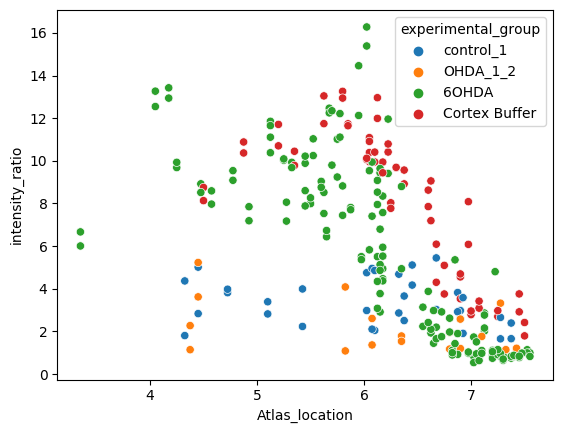

In [175]:
sns.scatterplot(data=dff, x='Atlas_location', y='intensity_ratio', hue='experimental_group')
plt.show()

In [156]:
sns.catplot(data=dff, col='slice id', y='intensity_ratio',
            x='experimental_group')
plt.show()

KeyError: 'slice id'

In [ ]:
sns.catplot(data=df, col='slice id', y='average striatum',
            x='experimental_group')

In [ ]:
df['average striatum'] - df['striatum intensity background sub'] / df['ctx background sub']

In [ ]:
# normalized version
cont_ant_avg = np.mean(df[np.logical_and(df.experimental_group == 'control_3',
                                         df['slice id'] == 'anterior')]['average striatum'])

cont_tail_avg = np.mean(df[np.logical_and(df.experimental_group == 'control_3',
                                         df['slice id'] == 'tail')]['average striatum'])

In [ ]:
for i in df.index:
    if df.loc[i, 'slice id'] == 'anterior':
        df.loc[i, 'normalized_average_intensity'] = df.loc[i, 'average striatum'] / cont_ant_avg
    if df.loc[i, 'slice id'] == 'tail':
        df.loc[i, 'normalized_average_intensity'] = df.loc[i, 'average striatum'] / cont_tail_avg 

In [ ]:
sns.catplot(data=df, col='slice id', y='normalized_average_intensity',
            x='experimental_group')
sns.catplot(data=df, col='slice id', y='normalized_average_intensity',
            x='experimental_group', kind='point')

In [ ]:
df[np.logical_and(df.experimental_group == 'control_3',
                                         df['slice id'] == 'tail')]['average intensity']

In [ ]:
df.loc[62]

In [ ]:
df.loc[72]

In [ ]:
df[np.logical_and(df['mouse id']=='SF06', df['slice id']=='tail')]